In [1]:
import io
import cv2
import numpy as np
from IPython.display import clear_output, Image, display
import PIL.Image
from matplotlib import pyplot as plt
from numpy import load
import pandas as pd

In [2]:
def showarray(a, fmt='jpeg'):
    a_n = np.uint8(np.clip(a, 0, 255))
    try :
        f = io.BytesIO()
        PIL.Image.fromarray(a_n).save(f, fmt)
        display(Image(data=f.getvalue()))
    except:
        #a = a[:, :, ::-1] # convert image from RGB (skimage) to BGR (opencv)
        # display image   
        plt.imshow(a)
        plt.show()  

# Cleaning of the Input file
We are going to analize the files and clean  that we have created in the part 1
Let us first select the first created file.

In [3]:
#Preprocessed image rgb color - no image filters
file_name = "preprocessed_training_data-1.npy"
#file_name = "training_data-1.npy"

In [4]:
#Processed image single color
#file_name = "processed_training_data-1.npy"

In [5]:
# full file info
train_data = np.load(file_name,allow_pickle=True)

In [6]:
# This file has the following shape
train_data.shape
#(500, 2)

(500, 2)

In [7]:
#train_data

In [8]:
type(train_data )

numpy.ndarray

The the first  input frames are presented as:

In [9]:
#train_data[#][1 inputs]
#train_data[#][0 images]

In [10]:
train_data[0][1]

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0])

In [11]:
train_data[1][1]

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0])

In [12]:
train_data[2][1]

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0])

There are 29 input componentes for each frame, we can plot the histogram for each component

In [13]:
train_data.shape

(500, 2)

In [14]:
train_hist = train_data[:]

In [15]:
train_hist.shape

(500, 2)

In [16]:
train_hist[1][1].ndim  # The input is Unidmensinal

1

In [17]:
train_hist[1][0].ndim  # The image is 3 dimensional

3

In [18]:
df = pd.DataFrame()
for i in range(len(train_hist)):
    row=list(train_hist[i][1])    # Unidimensional mapping of inputs
    #print(row)   
    temp = pd.DataFrame([row])
   # print(temp)
    df = pd.concat([df, temp])
  

In [19]:
df=df.reset_index(drop=True)

In [20]:
df

0   1   2   3   4   5   6   7   8   9   ...  19  20  21  22  23  24  25  \
0     0   0   0   0   0   0   0   0   1   0  ...   0   0   0   0   0   0   0   
1     0   0   0   0   0   0   0   0   1   0  ...   0   0   0   0   0   0   0   
2     0   0   0   0   0   0   0   0   1   0  ...   0   0   0   0   0   0   0   
3     0   0   0   0   0   0   0   0   1   0  ...   0   0   0   0   0   0   0   
4     0   0   0   0   0   0   0   0   1   0  ...   0   0   0   0   0   0   0   
..   ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ...  ..  ..  ..  ..  ..  ..  ..   
495   0   0   0   0   0   0   0   0   1   0  ...   0   0   0   0   0   0   0   
496   0   0   0   0   0   0   0   0   1   0  ...   0   0   0   0   0   0   0   
497   0   0   0   0   0   0   0   0   1   0  ...   0   0   0   0   0   0   0   
498   0   0   0   0   0   0   0   0   1   0  ...   0   0   0   0   0   0   0   
499   0   0   0   0   0   0   0   0   1   0  ...   0   0   0   0   0   0   0   

     26  27  28  
0     0   0   0  
1     0   0   0  
2     0   0   0  
3     0   0   0  
4     0   0   0  
..   ..  ..  ..  
495   0   0   0  
496   0   0   0  
497   0   0   0  
498   0   0   0  
499   0   0   0  

[500 rows x 29 columns]

We can analize the train data

In [21]:
#df_test = pd.DataFrame({'a':[1,0,0,1,3], 'b':[0,0,1,0,1], 'c':[0,0,0,0,0]})

In [22]:
#df_test

In [23]:
#(df_test == 0).astype(int).sum(axis=1)

In [24]:
#(df_test == 0).astype(int).sum(axis=0)

In [25]:
(df != 0).astype(int).sum(axis=0)

0       0
1       0
2       0
3       0
4       0
5       0
6       0
7       0
8     500
9       0
10      0
11      0
12    456
13     27
14      0
15      0
16      0
17      0
18      0
19      0
20      0
21      0
22      0
23      0
24      0
25      0
26      0
27      0
28      0
dtype: int64

In [26]:
#We count rows different to zero
(df[13] != 0).astype(int).sum(axis=0)

27

In [27]:
num_bins = 25
samples_per_bin = 100
hist, bins = np.histogram(df[13], num_bins)
center = (bins[:-1]+ bins[1:]) * 0.5

total data: 500


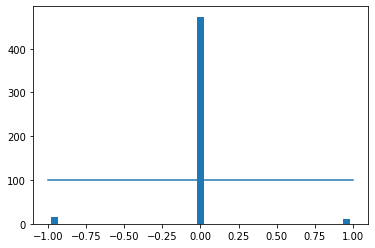

In [28]:
plt.bar(center, hist, width=0.05)
plt.plot((np.min(df[13]), np.max(df[13])), (samples_per_bin, samples_per_bin))
print('total data:', len(df[13]))

In [29]:
from sklearn.utils import shuffle

In [30]:
bins

array([-1.  , -0.92, -0.84, -0.76, -0.68, -0.6 , -0.52, -0.44, -0.36,
       -0.28, -0.2 , -0.12, -0.04,  0.04,  0.12,  0.2 ,  0.28,  0.36,
        0.44,  0.52,  0.6 ,  0.68,  0.76,  0.84,  0.92,  1.  ])

In [31]:
remove_list = []
for j in range(num_bins):
    list_ = []
    for i in range(len(df[13])):
        serie=df[13].iloc[[i]]
        ls = serie.tolist()
        if ls[0] >= bins[j] and ls[0] <= bins[j+1]:
            list_.append(i)      
    #list_ = shuffle(list_)
    list_ = list_[samples_per_bin:]
    remove_list.extend(list_)

In [31]:
print('removed:', len(remove_list))

removed: 373


In [32]:
df_removed=df.drop(remove_list, axis=0, inplace=False)

In [33]:
#We count rows different to zero
(df_removed[13] != 0).astype(int).sum(axis=0)

27

In [34]:
#You can delete a list of rows from Pandas by passing the list of indices to the drop() method.
#remove_list is the index of the rows you want to delete
#axis=0 denotes that rows should be deleted from the dataframe
#inplace=True performs the drop operation in the same dataframe

In [35]:
df.drop(df.index[remove_list], inplace=True)
print('remaining:', len(df))

remaining: 127


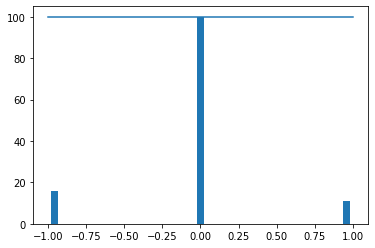

In [36]:
hist, _ = np.histogram(df[13], (num_bins))
plt.bar(center, hist, width=0.05)
plt.plot((np.min(df[13]), np.max(df[13])), (samples_per_bin, samples_per_bin))

In [248]:
df=df.reset_index(drop=True) # We reset the index ! attention

In [249]:
df

0   1   2   3   4   5   6   7   8   9   ...  19  20  21  22  23  24  25  \
0     0   0   0   0   0   0   0   0   1   0  ...   0   0   0   0   0   0   0   
1     0   0   0   0   0   0   0   0   1   0  ...   0   0   0   0   0   0   0   
2     0   0   0   0   0   0   0   0   1   0  ...   0   0   0   0   0   0   0   
3     0   0   0   0   0   0   0   0   1   0  ...   0   0   0   0   0   0   0   
4     0   0   0   0   0   0   0   0   1   0  ...   0   0   0   0   0   0   0   
..   ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ...  ..  ..  ..  ..  ..  ..  ..   
122   0   0   0   0   0   0   0   0   1   0  ...   0   0   0   0   0   0   0   
123   0   0   0   0   0   0   0   0   1   0  ...   0   0   0   0   0   0   0   
124   0   0   0   0   0   0   0   0   1   0  ...   0   0   0   0   0   0   0   
125   0   0   0   0   0   0   0   0   1   0  ...   0   0   0   0   0   0   0   
126   0   0   0   0   0   0   0   0   1   0  ...   0   0   0   0   0   0   0   

     26  27  28  
0     0   0   0  
1     0   0   0  
2     0   0   0  
3     0   0   0  
4     0   0   0  
..   ..  ..  ..  
122   0   0   0  
123   0   0   0  
124   0   0   0  
125   0   0   0  
126   0   0   0  

[127 rows x 29 columns]

# Cleaning of the Image array

The purpose of this section is select the image arrays that corresponds to the selected input choosed in the previous section.

Let us randomly choose an image from the train data

In [210]:
train_data[100][0].size

388800

In [211]:
train_data[100][0]

array([[[217, 164,  82],
        [216, 164,  81],
        [217, 164,  82],
        ...,
        [222, 173,  96],
        [222, 174,  96],
        [221, 174,  96]],

       [[218, 165,  83],
        [218, 165,  83],
        [218, 165,  83],
        ...,
        [223, 175,  97],
        [223, 175,  97],
        [223, 175,  97]],

       [[218, 166,  85],
        [218, 166,  85],
        [218, 166,  85],
        ...,
        [224, 176,  98],
        [224, 176,  98],
        [223, 176,  99]],

       ...,

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]]

In [206]:
train_data[100][0].shape

(270, 480, 3)

In [207]:
train_data[100][0].ndim

3

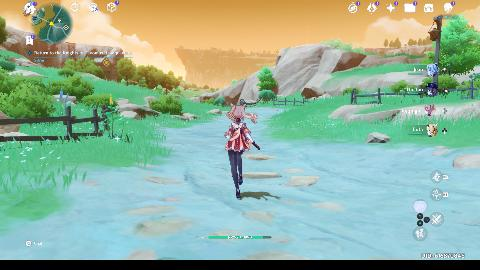

In [236]:
img1=train_data[100][0]
showarray(img1)

Let us repeat the same analysis for the train_hist = train_data[:]

In [212]:
#Let us  find the shape of the array
train_hist[1][0].shape

(270, 480, 3)

In [213]:
#To find the number of dimensions of the array
train_hist[1][0].ndim

3

We have seen that the images are 3 dimensional,  use the one to one mapping into dataframes may be not the solution to create dataframes

In [178]:
#To find the total number of elements in the array
train_hist[1][0].size

388800

In [179]:
type(train_hist[1][0])

numpy.ndarray

In [180]:
train_hist[1][0].ndim

3

In [181]:
train_hist[1][0].shape

(270, 480, 3)

In [182]:
rowa=list(train_hist[1][0])  # This mapping gives one dimensional shape .
# We need keep (270, 480, 3)!

In [183]:
len(rowa)

270

In [184]:
type(rowa)

list

In [185]:
# This trick convert list to numpy array

In [186]:
arr = np.asarray(rowa)

In [187]:
arr.shape

(270, 480, 3)

In [188]:
arr.ndim

3

In [189]:
#arr

We have seen that mapping array to list we lost the shape

In [146]:
df_image = pd.DataFrame()
for i in range(len(train_hist)):
    row=list(train_hist[i][0]) # For images  Here we lost the (i, 480, 3) shape
    #print(row)    
    temp = pd.DataFrame([row])
  
   # print(temp)
    df_image = pd.concat([df_image, temp])
df_image=df_image.reset_index(drop=True)
df_image_removed=df_image.drop(remove_list, axis=0, inplace=False)
df_image_clean=df_image_removed.reset_index(drop=True)
df_image_clean.shape

(127, 270)

## We need keep (270, 480, 3) shape

So let us choose the first image from the dataframe

In [70]:
df_image_clean.head(1)

0    \
0  [[228, 176, 98], [228, 176, 98], [228, 175, 98...   

                                                 1    \
0  [[230, 176, 99], [230, 176, 99], [230, 176, 99...   

                                                 2    \
0  [[231, 178, 100], [231, 177, 100], [231, 177, ...   

                                                 3    \
0  [[232, 179, 101], [232, 178, 101], [232, 178, ...   

                                                 4    \
0  [[233, 180, 102], [233, 179, 102], [233, 179, ...   

                                                 5    \
0  [[235, 181, 104], [234, 180, 104], [234, 180, ...   

                                                 6    \
0  [[235, 182, 105], [235, 182, 105], [235, 181, ...   

                                                 7    \
0  [[237, 183, 107], [236, 182, 106], [236, 182, ...   

                                                 8    \
0  [[237, 184, 108], [237, 184, 108], [237, 183, ...   

                                                 9    ...  \
0  [[238, 186, 113], [238, 184, 109], [238, 184, ...  ...   

                                                 260  \
0  [[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [...   

                                                 261  \
0  [[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [...   

                                                 262  \
0  [[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [...   

                                                 263  \
0  [[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [...   

                                                 264  \
0  [[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [...   

                                                 265  \
0  [[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [...   

                                                 266  \
0  [[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [...   

                                                 267  \
0  [[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [...   

                                                 268  \
0  [[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [...   

                                                 269  
0  [[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [...  

[1 rows x 270 columns]

In [71]:
df_image_clean.head(1).T

0
0    [[228, 176, 98], [228, 176, 98], [228, 175, 98...
1    [[230, 176, 99], [230, 176, 99], [230, 176, 99...
2    [[231, 178, 100], [231, 177, 100], [231, 177, ...
3    [[232, 179, 101], [232, 178, 101], [232, 178, ...
4    [[233, 180, 102], [233, 179, 102], [233, 179, ...
..                                                 ...
265  [[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [...
266  [[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [...
267  [[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [...
268  [[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [...
269  [[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [...

[270 rows x 1 columns]

In [94]:
df_image_clean.head(1).T.values.tolist()

[[array([[228, 176,  98],
         [228, 176,  98],
         [228, 175,  98],
         ...,
         [232, 183, 111],
         [232, 184, 111],
         [232, 183, 111]], dtype=uint8)],
 [array([[230, 176,  99],
         [230, 176,  99],
         [230, 176,  99],
         ...,
         [233, 184, 112],
         [233, 184, 112],
         [233, 184, 113]], dtype=uint8)],
 [array([[231, 178, 100],
         [231, 177, 100],
         [231, 177, 100],
         ...,
         [234, 185, 113],
         [234, 185, 113],
         [234, 186, 114]], dtype=uint8)],
 [array([[232, 179, 101],
         [232, 178, 101],
         [232, 178, 101],
         ...,
         [234, 186, 114],
         [234, 186, 114],
         [234, 186, 115]], dtype=uint8)],
 [array([[233, 180, 102],
         [233, 179, 102],
         [233, 179, 102],
         ...,
         [236, 187, 115],
         [236, 187, 116],
         [235, 187, 116]], dtype=uint8)],
 [array([[235, 181, 104],
         [234, 180, 104],
         [234, 180

In [72]:
df_image_clean.head(1).T.to_numpy().shape

(270, 1)

In [74]:
image_1=df_image_clean.head(1).T.to_numpy()

In [98]:
type(image_1)

numpy.ndarray

In [99]:
list1 =image_1.tolist()

In [122]:
list1

[[array([[228, 176,  98],
         [228, 176,  98],
         [228, 175,  98],
         ...,
         [232, 183, 111],
         [232, 184, 111],
         [232, 183, 111]], dtype=uint8)],
 [array([[230, 176,  99],
         [230, 176,  99],
         [230, 176,  99],
         ...,
         [233, 184, 112],
         [233, 184, 112],
         [233, 184, 113]], dtype=uint8)],
 [array([[231, 178, 100],
         [231, 177, 100],
         [231, 177, 100],
         ...,
         [234, 185, 113],
         [234, 185, 113],
         [234, 186, 114]], dtype=uint8)],
 [array([[232, 179, 101],
         [232, 178, 101],
         [232, 178, 101],
         ...,
         [234, 186, 114],
         [234, 186, 114],
         [234, 186, 115]], dtype=uint8)],
 [array([[233, 180, 102],
         [233, 179, 102],
         [233, 179, 102],
         ...,
         [236, 187, 115],
         [236, 187, 116],
         [235, 187, 116]], dtype=uint8)],
 [array([[235, 181, 104],
         [234, 180, 104],
         [234, 180

In [129]:
# 2-D List
matrix = list1
flatten_matrix = []
  
for sublist in matrix:
    for val in sublist:
        #print(type(val.tolist()))
        val_list=val.tolist()
        flatten_matrix.append(val_list)          
#print(flatten_matrix)

[[[228, 176, 98], [228, 176, 98], [228, 175, 98], [228, 175, 98], [229, 175, 98], [228, 175, 97], [228, 175, 98], [228, 175, 97], [229, 175, 97], [228, 175, 97], [228, 175, 97], [228, 175, 97], [228, 175, 97], [228, 174, 96], [228, 174, 97], [228, 174, 96], [228, 174, 97], [228, 174, 96], [228, 174, 96], [227, 174, 96], [227, 174, 96], [227, 174, 96], [227, 174, 96], [227, 174, 96], [226, 174, 96], [226, 174, 96], [226, 174, 96], [226, 173, 96], [226, 174, 96], [226, 173, 95], [226, 173, 96], [226, 173, 95], [226, 173, 95], [199, 159, 97], [225, 173, 95], [225, 172, 95], [226, 173, 95], [226, 173, 95], [226, 173, 95], [225, 173, 94], [225, 173, 94], [225, 172, 94], [225, 172, 94], [224, 172, 94], [224, 172, 94], [224, 172, 94], [224, 172, 94], [224, 171, 93], [224, 172, 93], [224, 171, 93], [224, 171, 93], [224, 171, 92], [224, 171, 92], [224, 171, 92], [224, 171, 92], [224, 171, 91], [224, 171, 92], [224, 170, 91], [224, 171, 91], [224, 170, 91], [224, 170, 91], [224, 170, 91], [224, 

In [132]:
# Nested List Comprehension to flatten a given 2-D matrix
# 2-D List
matrix = list1
flatten_matrix = [val.tolist() for sublist in matrix for val in sublist]

In [133]:
#flatten_matrix

[[[228, 176, 98],
  [228, 176, 98],
  [228, 175, 98],
  [228, 175, 98],
  [229, 175, 98],
  [228, 175, 97],
  [228, 175, 98],
  [228, 175, 97],
  [229, 175, 97],
  [228, 175, 97],
  [228, 175, 97],
  [228, 175, 97],
  [228, 175, 97],
  [228, 174, 96],
  [228, 174, 97],
  [228, 174, 96],
  [228, 174, 97],
  [228, 174, 96],
  [228, 174, 96],
  [227, 174, 96],
  [227, 174, 96],
  [227, 174, 96],
  [227, 174, 96],
  [227, 174, 96],
  [226, 174, 96],
  [226, 174, 96],
  [226, 174, 96],
  [226, 173, 96],
  [226, 174, 96],
  [226, 173, 95],
  [226, 173, 96],
  [226, 173, 95],
  [226, 173, 95],
  [199, 159, 97],
  [225, 173, 95],
  [225, 172, 95],
  [226, 173, 95],
  [226, 173, 95],
  [226, 173, 95],
  [225, 173, 94],
  [225, 173, 94],
  [225, 172, 94],
  [225, 172, 94],
  [224, 172, 94],
  [224, 172, 94],
  [224, 172, 94],
  [224, 172, 94],
  [224, 171, 93],
  [224, 172, 93],
  [224, 171, 93],
  [224, 171, 93],
  [224, 171, 92],
  [224, 171, 92],
  [224, 171, 92],
  [224, 171, 92],
  [224, 17

References:

https://stackoverflow.com/questions/1198777/double-iteration-in-list-comprehension
https://stackoverflow.com/questions/17657720/python-list-comprehension-double-for  
https://www.geeksforgeeks.org/nested-list-comprehensions-in-python/

In [136]:
# converting list to array
arr = np.array(flatten_matrix)

In [138]:
arr.ndim

3

In [139]:
arr.shape

(270, 480, 3)

Great, we could obtain our desired dimension

In [160]:
image_clean=df_image_clean.head(1).T.to_numpy()
lists =image_clean.tolist()
# Nested List Comprehension to flatten a given 2-D matrix
# 2-D List
matrix = lists
flatten_matrix = [val.tolist() for sublist in matrix for val in sublist]
# converting list to array
arr = np.array(flatten_matrix)

In [161]:
arr.shape

(270, 480, 3)

In [164]:
arr.size

388800

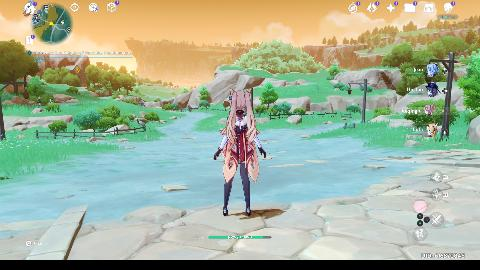

In [175]:
showarray(arr)

With the exercise done before now we can create the function that convert the dataframe row to numpy image array

In [216]:
def df_to_numpy_image(df_image_clean,index):
    #select the row with index label 'index'
    image_clean=df_image_clean.loc[[index]].T.to_numpy()
    lists =image_clean.tolist()
    # Nested List Comprehension to flatten a given 2-D matrix
    # 2-D List
    matrix = lists
    flatten_matrix = [val.tolist() for sublist in matrix for val in sublist]
    # converting list to array
    arr = np.array(flatten_matrix)
    return arr

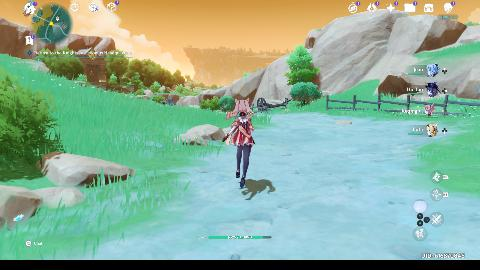

In [244]:
image1=df_to_numpy_image(df_image_clean,100)
showarray(image1)

In [246]:
image1.shape

(270, 480, 3)

## Creation of train and test split

In [252]:
len(df)

127

In [253]:
len(df_image_clean)

127

In [268]:
#We verify that the dimensions are the same
assert len(df) == len(df_image_clean), "The dimensions are not equal, something is wrong "

In [269]:
#train_data[#][1 inputs]
#train_data[#][0 images]

In [270]:
from sklearn.model_selection import train_test_split

In [271]:
#image_paths = np.asarray(image_path)
#steerings = np.asarray(steering)

In [272]:
X_train, X_valid, y_train, y_valid = train_test_split(df_image_clean, df, test_size=0.2, random_state=6)

In [77]:
#train, test = train_test_split(df, test_size=0.2)

In [275]:
print('Training Samples: {}\nValid Samples: {}'.format(len(X_train), len(y_valid)))

Training Samples: 101
Valid Samples: 26


Text(0.5, 1.0, 'Validation set')

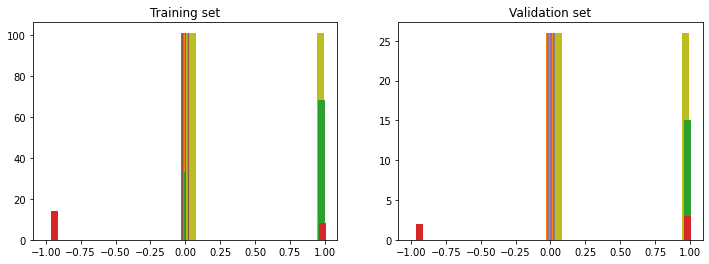

In [276]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
axes[0].hist(y_train, bins=num_bins, width=0.05)
axes[0].set_title('Training set')
axes[1].hist(y_valid, bins=num_bins, width=0.05)
axes[1].set_title('Validation set')

## Train Image part ( 4 Dimensional)

In [277]:
len(X_train)

101

In [282]:
X_image = np.array([df_to_numpy_image(X_train,i) for i in X_train.index])

In [283]:
X_image.shape

(101, 270, 480, 3)

In [284]:
# We perform the reshape

In [285]:
WIDTH = 480
HEIGHT = 270

In [286]:
# For cleaned processed rgb
X=X_image.reshape(-1,WIDTH,HEIGHT,3)
X.shape
#(101, 480, 270, 3) # the first number may change between the range (0 ,500)

(101, 480, 270, 3)

In [287]:
X.size

39268800

## Train Input part ( 1 Dimensional )

In [288]:
 y_train

0   1   2   3   4   5   6   7   8   9   ...  19  20  21  22  23  24  25  \
54    0   0   0   0   0   0   0   0   1   0  ...   0   0   0   0   0   0   0   
87    0   0   0   0   0   0   0   0   1   0  ...   0   0   0   0   0   0   0   
45    0   0   0   0   0   0   0   0   1   0  ...   0   0   0   0   0   0   0   
104   0   0   0   0   0   0   0   0   1   0  ...   0   0   0   0   0   0   0   
72    0   0   0   0   0   0   0   0   1   0  ...   0   0   0   0   0   0   0   
..   ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ...  ..  ..  ..  ..  ..  ..  ..   
106   0   0   0   0   0   0   0   0   1   0  ...   0   0   0   0   0   0   0   
84    0   0   0   0   0   0   0   0   1   0  ...   0   0   0   0   0   0   0   
99    0   0   0   0   0   0   0   0   1   0  ...   0   0   0   0   0   0   0   
73    0   0   0   0   0   0   0   0   1   0  ...   0   0   0   0   0   0   0   
10    0   0   0   0   0   0   0   0   1   0  ...   0   0   0   0   0   0   0   

     26  27  28  
54    0   0   0  
87    0   0   0  
45    0   0   0  
104   0   0   0  
72    0   0   0  
..   ..  ..  ..  
106   0   0   0  
84    0   0   0  
99    0   0   0  
73    0   0   0  
10    0   0   0  

[101 rows x 29 columns]

In [292]:
type(y_train.loc[[54]])

pandas.core.frame.DataFrame

In [294]:
y_train.loc[[54]]

0   1   2   3   4   5   6   7   8   9   ...  19  20  21  22  23  24  25  \
54   0   0   0   0   0   0   0   0   1   0  ...   0   0   0   0   0   0   0   

    26  27  28  
54   0   0   0  

[1 rows x 29 columns]

In [309]:
y_train.loc[[54]]

0   1   2   3   4   5   6   7   8   9   ...  19  20  21  22  23  24  25  \
54   0   0   0   0   0   0   0   0   1   0  ...   0   0   0   0   0   0   0   

    26  27  28  
54   0   0   0  

[1 rows x 29 columns]

In [325]:
# flattening a 2d numpy array
# into 1d array
# Multiplying arrays
result = y_train.loc[[54]].values.ravel()
#Remove dtype at the end of numpy array
list_y_train=y_train.loc[[54]].values.tolist()
result2=np.array(list_y_train).ravel()

In [326]:
result

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [327]:
result2

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0])

In [328]:
def df_to_numpy_input(df_input,index): 
    # flattening a 2d numpy array
    # into 1d array
    # and remove dtype at the end of numpy array
    lista=df_input.loc[[index]].values.tolist()
    arr=np.array(lista).ravel()
    return arr


In [329]:
df_to_numpy_input(y_train,54)

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0])

In [330]:
Y = [df_to_numpy_input(y_train,i) for i in y_train.index]

In [331]:
Y[0]

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0])

In [332]:
len(Y)

101

In [333]:
type(Y)

list

In [ ]:
from IPython.display import display_html
def restartkernel() :
    display_html("<script>Jupyter.notebook.kernel.restart()</script>",raw=True)

In [ ]:
restartkernel()

## Full code

In [32]:
import numpy as np
from grabscreen import grab_screen
import cv2
#import tdqm
import os
import pandas as pd
#from tqdm import tqdm
from collections import deque
from models import inception_v3 as googlenet
from models import alexnet2
from random import shuffle
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
WIDTH = 480
HEIGHT = 270

def df_to_numpy_input(df_input,index): 
    # flattening a 2d numpy array
    # into 1d array
    # and remove dtype at the end of numpy array
    lista=df_input.loc[[index]].values.tolist()
    arr=np.array(lista).ravel()
    return arr

def df_to_numpy_image(df_image_clean,index):
    #select the row with index label 'index'
    image_clean=df_image_clean.loc[[index]].T.to_numpy()
    lists =image_clean.tolist()
    # Nested List Comprehension to flatten a given 2-D matrix
    # 2-D List
    matrix = lists
    flatten_matrix = [val.tolist() for sublist in matrix for val in sublist]
    # converting list to array
    arr = np.array(flatten_matrix)
    return arr
def cleaning_data(train_data , show=False):
    #Creation and cleaning of the input dataframe
    df = pd.DataFrame()
    for i in range(len(train_data)):
        row=list(train_data[i][1])
        #print(row)
        temp = pd.DataFrame([row])
       # print(temp)
        df = pd.concat([df, temp])
    df=df.reset_index(drop=True)

    # Parameters of the cleaning part
    num_bins = 25
    samples_per_bin = 100
    hist, bins = np.histogram(df[13], num_bins)
    center = (bins[:-1]+ bins[1:]) * 0.5
    
    #Cleaning procedure
    remove_list = []
    for j in range(num_bins):
        list_ = []
        for i in range(len(df[13])):
            serie=df[13].iloc[[i]]
            ls = serie.tolist()
            if ls[0] >= bins[j] and ls[0] <= bins[j+1]:
                list_.append(i)      
        #list_ = shuffle(list_)
        list_ = list_[samples_per_bin:]
        remove_list.extend(list_)
        
    #Implementation of the cleaning    
    df_removed=df.drop(remove_list, axis=0, inplace=False)
    df.drop(df.index[remove_list], inplace=True)
    print('remaining:', len(df))
    df=df.reset_index(drop=True) # We reset the index ! attention    
    if show == True:
        #Visualization of cleaning
        hist, _ = np.histogram(df[13], (num_bins))
        plt.bar(center, hist, width=0.05)
        plt.plot((np.min(df[13]), np.max(df[13])), (samples_per_bin, samples_per_bin))
    
    #Creation and cleaning of the image dataframe
    
    df_image = pd.DataFrame()
    for i in range(len(train_data)):
        row=list(train_data[i][0]) # For images  Here we lost the (i, 480, 3) shape
        #print(row)    
        temp = pd.DataFrame([row])
       # print(temp)
        df_image = pd.concat([df_image, temp])
    df_image=df_image.reset_index(drop=True)
    df_image_removed=df_image.drop(remove_list, axis=0, inplace=False)
    df_image_clean=df_image_removed.reset_index(drop=True)
    #We verify that the dimensions are the same
    assert len(df) == len(df_image_clean), "The dimensions are not equal, something is wrong "
    
    return df_image_clean, df

Instructions for updating:
non-resource variables are not supported in the long term
curses is not supported on this machine (please install/reinstall curses for an optimal experience)


remaining: 126
Training Samples: 100
Valid Samples: 26


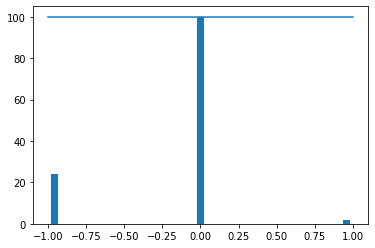

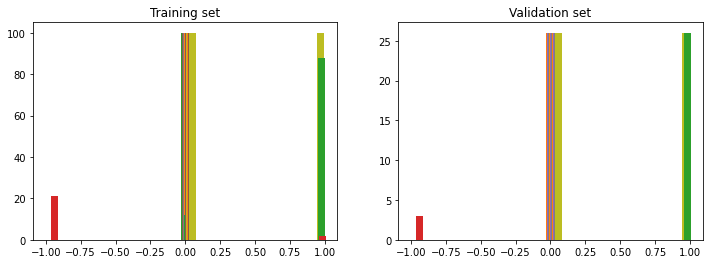

In [59]:
#processed image rgb color - no image filters
file_name = "preprocessed_training_data-5.npy"
# full file information
train_data = np.load(file_name,allow_pickle=True)
df_image_clean, df = cleaning_data(train_data,show=True)
X_train, X_valid, y_train, y_valid = train_test_split(df_image_clean, df, test_size=0.2, random_state=6)
print('Training Samples: {}\nValid Samples: {}'.format(len(X_train), len(y_valid)))
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
axes[0].hist(y_train, bins=num_bins, width=0.05)
axes[0].set_title('Training set')
axes[1].hist(y_valid, bins=num_bins, width=0.05)
axes[1].set_title('Validation set')
# Train Image part ( 4 Dimensional)
X_image = np.array([df_to_numpy_image(X_train,i) for i in X_train.index])
X=X_image.reshape(-1,WIDTH,HEIGHT,3)
#Train Input part ( 1 Dimensional )
Y = [df_to_numpy_input(y_train,i) for i in y_train.index]
# Test Image part ( 4 Dimensional)
test_image = np.array([df_to_numpy_image(X_valid,i) for i in X_valid.index])
test_x=test_image.reshape(-1,WIDTH,HEIGHT,3)
## Test Input part( 1 Dimensional )
test_y = [df_to_numpy_input(y_valid,i) for i in y_valid.index]

Let us choose a picture where was used lx

In [97]:
# selecting rows based on condition LX to the left
y_train.loc[y_train[13] < 0]

0   1   2   3   4   5   6   7   8   9   ...  19  20  21  22  23  24  25  \
103   0   0   0   0   0   0   0   0   1   0  ...   0   0   0   0   0   0   0   
107   0   0   0   0   0   0   0   0   1   0  ...   0   0   0   0   0   0   0   
115   0   0   0   0   0   0   0   0   1   0  ...   0   0   0   0   0   0   0   
104   0   0   0   0   0   0   0   0   1   0  ...   0   0   0   0   0   0   0   
112   0   0   0   0   0   0   0   0   1   0  ...   0   0   0   0   0   0   0   
113   0   0   0   0   0   0   0   0   1   0  ...   0   0   0   0   0   0   0   
47    0   0   0   0   0   0   0   0   1   0  ...   0   0   0   0   0   0   0   
119   0   0   0   0   0   0   0   0   1   0  ...   0   0   0   0   0   0   0   
118   0   0   0   0   0   0   0   0   1   0  ...   0   0   0   0   0   0   0   
114   0   0   0   0   0   0   0   0   1   0  ...   0   0   0   0   0   0   0   
125   0   0   0   0   0   0   0   0   1   0  ...   0   0   0   0   0   0   0   
111   0   0   0   0   0   0   0   0   1   0  ...   0   0   0   0   0   0   0   
123   0   0   0   0   0   0   0   0   1   0  ...   0   0   0   0   0   0   0   
117   0   0   0   0   0   0   0   0   1   0  ...   0   0   0   0   0   0   0   
116   0   0   0   0   0   0   0   0   1   0  ...   0   0   0   0   0   0   0   
110   0   0   0   0   0   0   0   0   1   0  ...   0   0   0   0   0   0   0   
122   0   0   0   0   0   0   0   0   1   0  ...   0   0   0   0   0   0   0   
120   0   0   0   0   0   0   0   0   1   0  ...   0   0   0   0   0   0   0   
108   0   0   0   0   0   0   0   0   1   0  ...   0   0   0   0   0   0   0   
121   0   0   0   0   0   0   0   0   1   0  ...   0   0   0   0   0   0   0   
109   0   0   0   0   0   0   0   0   1   0  ...   0   0   0   0   0   0   0   

     26  27  28  
103   0   0   0  
107   0   0   0  
115   0   0   0  
104   0   0   0  
112   0   0   0  
113   0   0   0  
47    0   0   0  
119   0   0   0  
118   0   0   0  
114   0   0   0  
125   0   0   0  
111   0   0   0  
123   0   0   0  
117   0   0   0  
116   0   0   0  
110   0   0   0  
122   0   0   0  
120   0   0   0  
108   0   0   0  
121   0   0   0  
109   0   0   0  

[21 rows x 29 columns]

In [88]:
def show_action(X_train,y_train,index_to_select):
    dato=np.array([y_train.loc[index_to_select].tolist()])
    columna=['W', 'S', 'A', 'D', 'WA', 'WD', 'SA', 'SD',' NOKEY','LT', 'RT', 'Lx', 'Ly', 'Rx', 'Ry', 'UP', 'DOWN', 'LEFT', 'RIGHT',
           'START', 'SELECT', 'L3', 'R3', 'LB', 'RB', 'A', 'B', 'X', 'Y']
    df_pred = pd.DataFrame(dato,columns=columna)
    df_pred_transposed = df_pred.T 
    print(df_pred_transposed) 
    image_check=df_to_numpy_image(X_train,index_to_select)
    showarray(image_check)

        0
W       0
S       0
A       0
D       0
WA      0
WD      0
SA      0
SD      0
 NOKEY  1
LT      0
RT      0
Lx      0
Ly      1
Rx     -1
Ry      0
UP      0
DOWN    0
LEFT    0
RIGHT   0
START   0
SELECT  0
L3      0
R3      0
LB      0
RB      0
A       0
B       0
X       0
Y       0


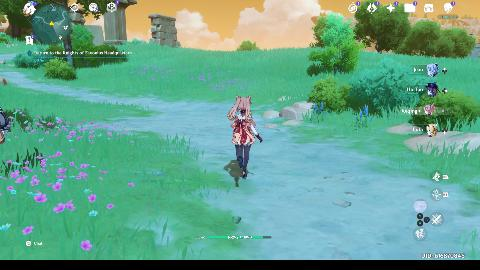

In [89]:
show_action(X_train,y_train,103)

        0
W       0
S       0
A       0
D       0
WA      0
WD      0
SA      0
SD      0
 NOKEY  1
LT      0
RT      0
Lx      0
Ly      1
Rx     -1
Ry      0
UP      0
DOWN    0
LEFT    0
RIGHT   0
START   0
SELECT  0
L3      0
R3      0
LB      0
RB      0
A       0
B       0
X       0
Y       0


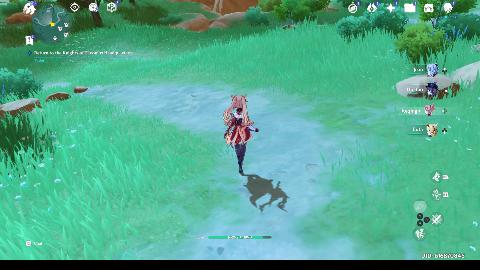

In [93]:
show_action(X_train,y_train,122)

In [98]:
# selecting rows based on condition LX to the right
y_train.loc[y_train[13] > 0]

0   1   2   3   4   5   6   7   8   9   ...  19  20  21  22  23  24  25  \
21    0   0   0   0   0   0   0   0   1   0  ...   0   0   0   0   0   0   0   
106   0   0   0   0   0   0   0   0   1   0  ...   0   0   0   0   0   0   0   

     26  27  28  
21    0   0   0  
106   0   0   0  

[2 rows x 29 columns]

        0
W       0
S       0
A       0
D       0
WA      0
WD      0
SA      0
SD      0
 NOKEY  1
LT      0
RT      0
Lx      0
Ly      1
Rx      1
Ry      0
UP      0
DOWN    0
LEFT    0
RIGHT   0
START   0
SELECT  0
L3      0
R3      0
LB      0
RB      0
A       0
B       0
X       0
Y       0


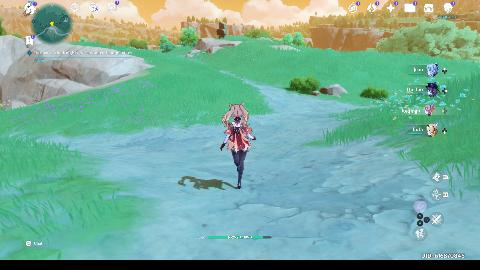

In [99]:
show_action(X_train,y_train,21)

        0
W       0
S       0
A       0
D       0
WA      0
WD      0
SA      0
SD      0
 NOKEY  1
LT      0
RT      0
Lx      0
Ly      1
Rx      1
Ry      0
UP      0
DOWN    0
LEFT    0
RIGHT   0
START   0
SELECT  0
L3      0
R3      0
LB      0
RB      0
A       0
B       0
X       0
Y       0


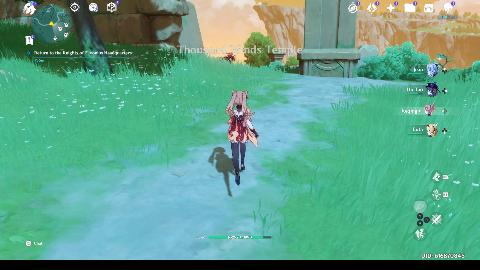

In [100]:
show_action(X_train,y_train,106)

# Analysis of all single training data

In [34]:
FILE_I_END=30
data_order = [i for i in range(1,FILE_I_END+1)]

preprocessed_training_data-1.npy
remaining: 127
Training Samples: 101
Valid Samples: 26
preprocessed_training_data-2.npy
remaining: 119
Training Samples: 95
Valid Samples: 24
preprocessed_training_data-3.npy
remaining: 134
Training Samples: 107
Valid Samples: 27
preprocessed_training_data-4.npy
remaining: 126
Training Samples: 100
Valid Samples: 26
preprocessed_training_data-5.npy
remaining: 126
Training Samples: 100
Valid Samples: 26
preprocessed_training_data-6.npy
remaining: 109
Training Samples: 87
Valid Samples: 22
preprocessed_training_data-7.npy
remaining: 106
Training Samples: 84
Valid Samples: 22
preprocessed_training_data-8.npy
remaining: 120
Training Samples: 96
Valid Samples: 24
preprocessed_training_data-9.npy
remaining: 108
Training Samples: 86
Valid Samples: 22
preprocessed_training_data-10.npy
remaining: 134
Training Samples: 107
Valid Samples: 27
preprocessed_training_data-11.npy
remaining: 120
Training Samples: 96
Valid Samples: 24
preprocessed_training_data-12.npy
re

C:\Anaconda3\envs\pygta5\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  # This is added back by InteractiveShellApp.init_path()


preprocessed_training_data-21.npy
remaining: 139
Training Samples: 111
Valid Samples: 28
preprocessed_training_data-22.npy
remaining: 111
Training Samples: 88
Valid Samples: 23
preprocessed_training_data-23.npy
remaining: 133
Training Samples: 106
Valid Samples: 27
preprocessed_training_data-24.npy
remaining: 119
Training Samples: 95
Valid Samples: 24
preprocessed_training_data-25.npy
remaining: 133
Training Samples: 106
Valid Samples: 27
preprocessed_training_data-26.npy
remaining: 148
Training Samples: 118
Valid Samples: 30
preprocessed_training_data-27.npy
remaining: 112
Training Samples: 89
Valid Samples: 23
preprocessed_training_data-28.npy
remaining: 128
Training Samples: 102
Valid Samples: 26
preprocessed_training_data-29.npy
remaining: 136
Training Samples: 108
Valid Samples: 28
preprocessed_training_data-30.npy
remaining: 145
Training Samples: 116
Valid Samples: 29


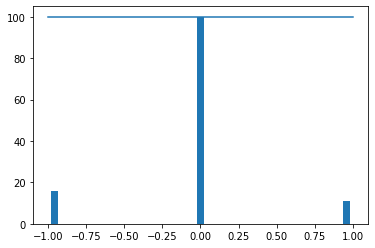

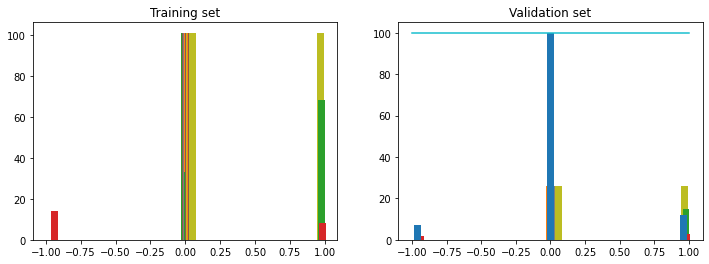

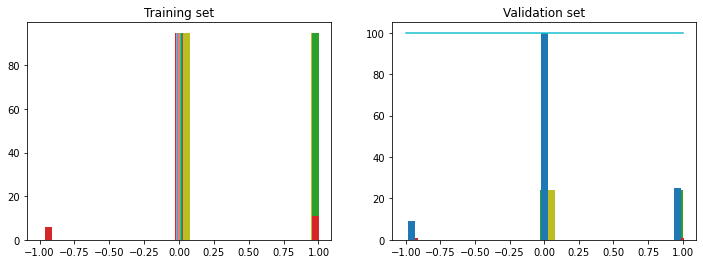

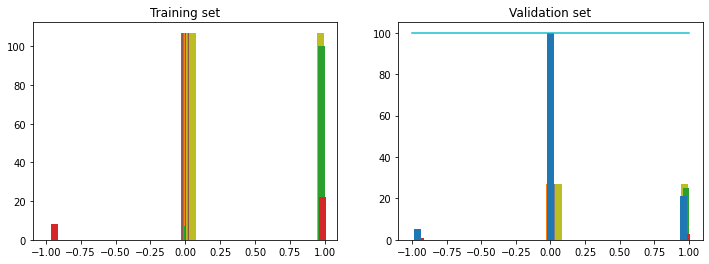

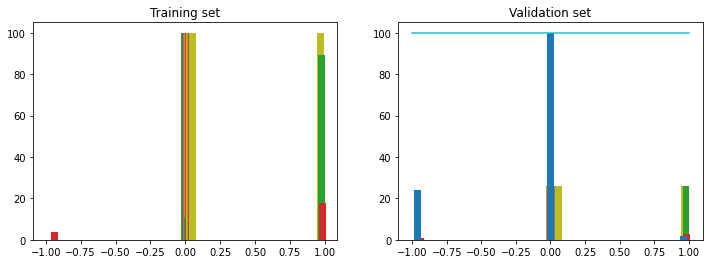

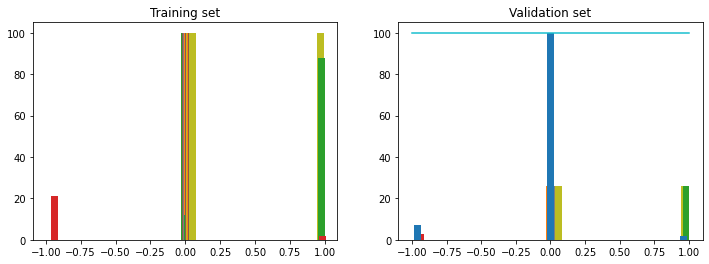

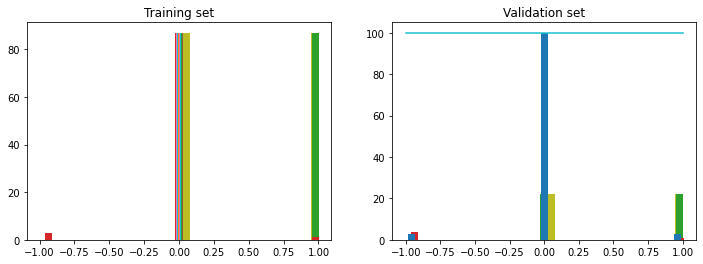

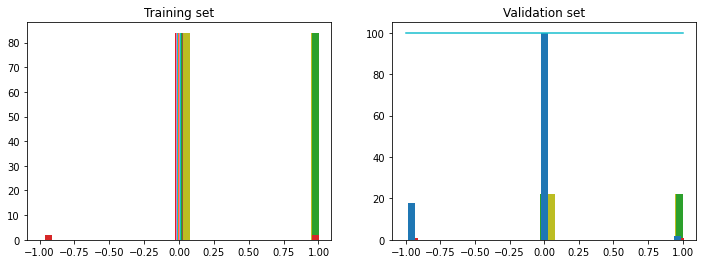

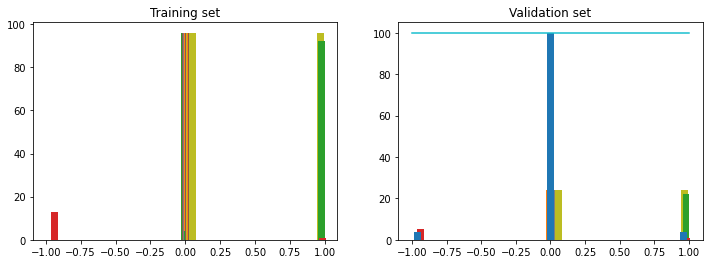

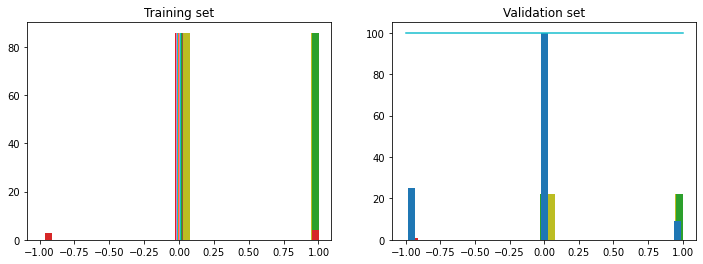

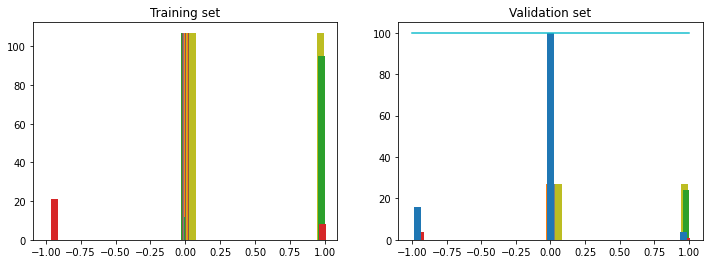

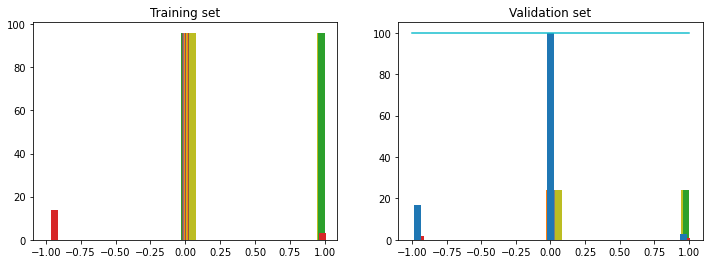

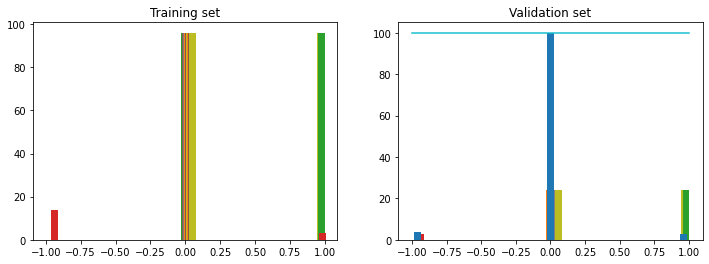

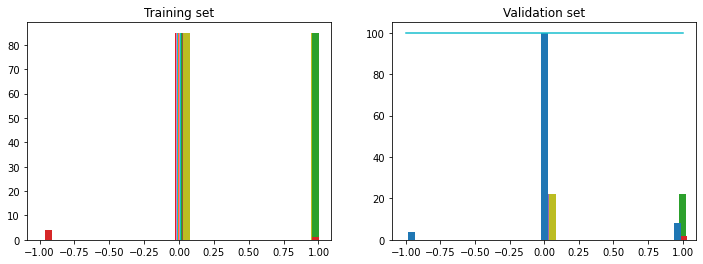

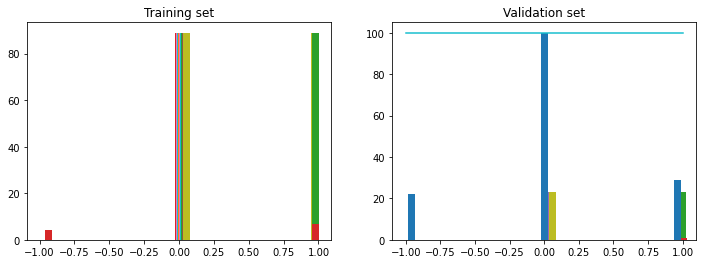

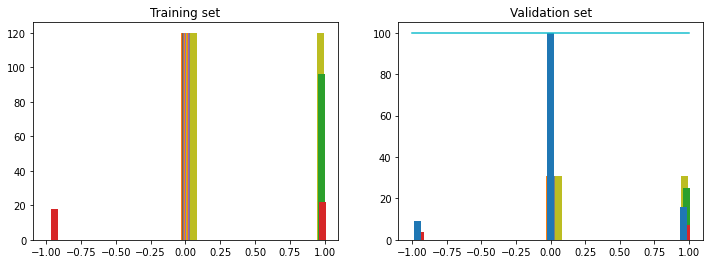

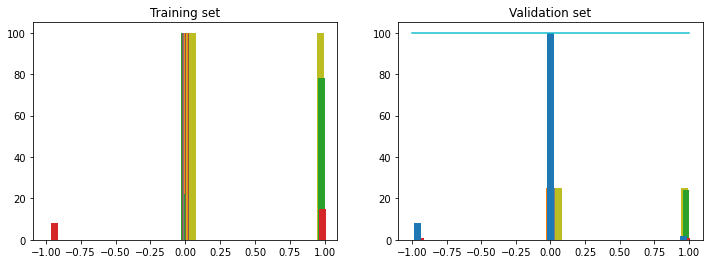

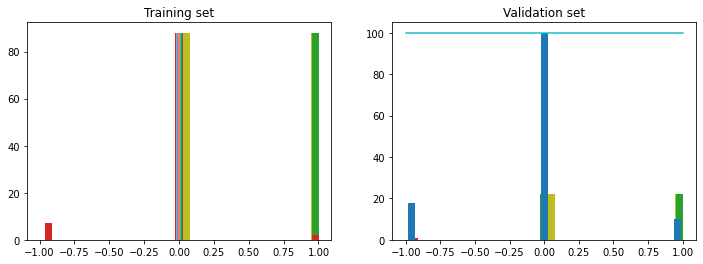

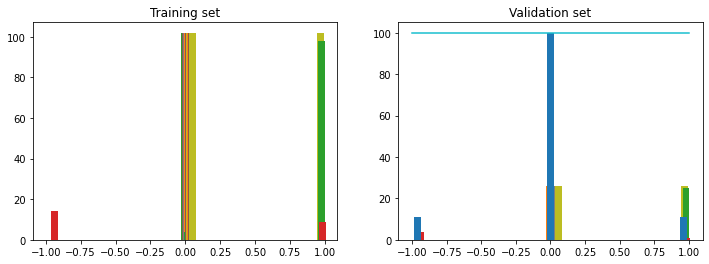

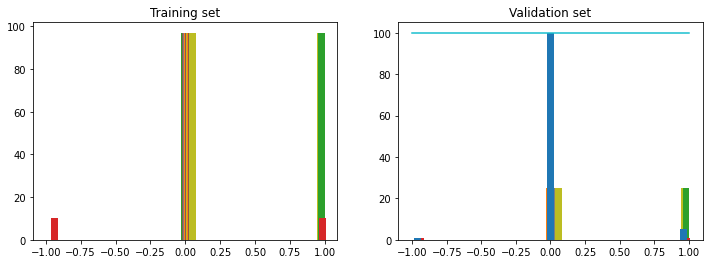

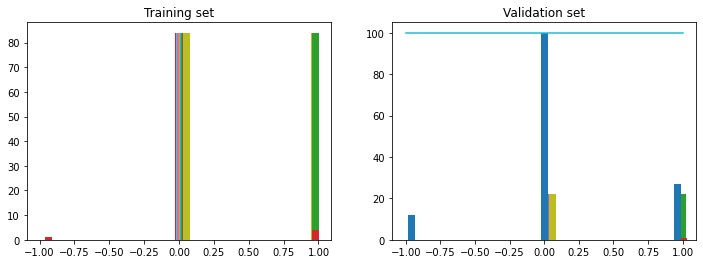

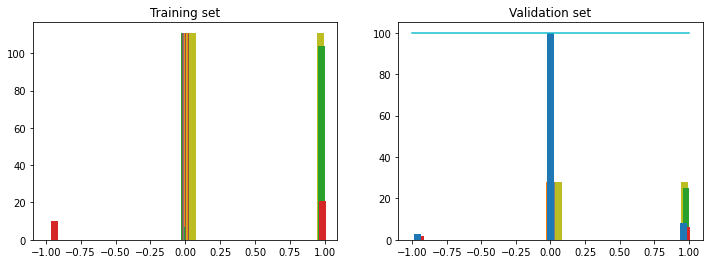

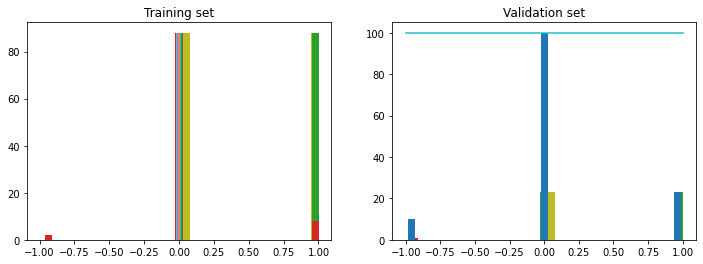

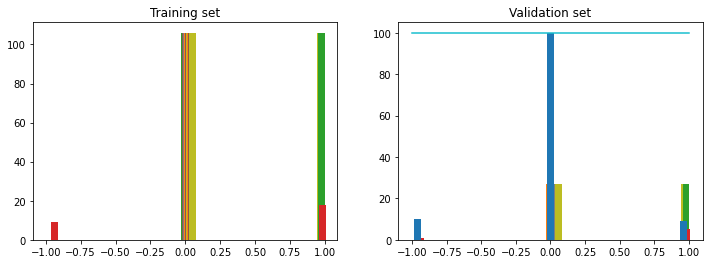

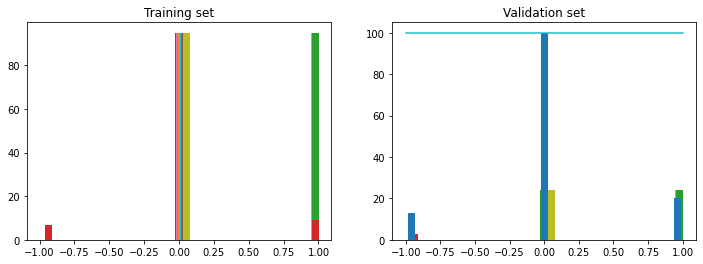

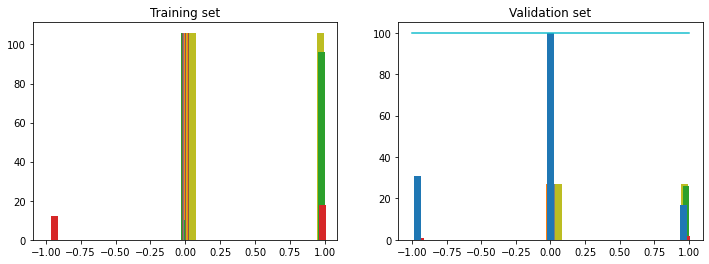

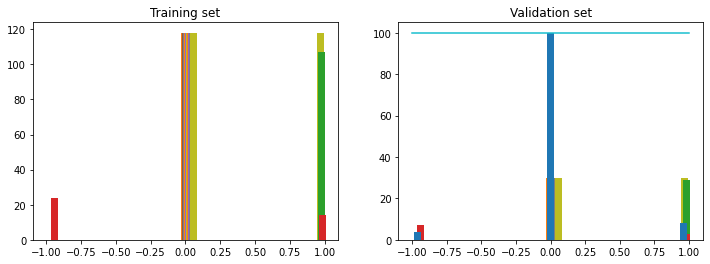

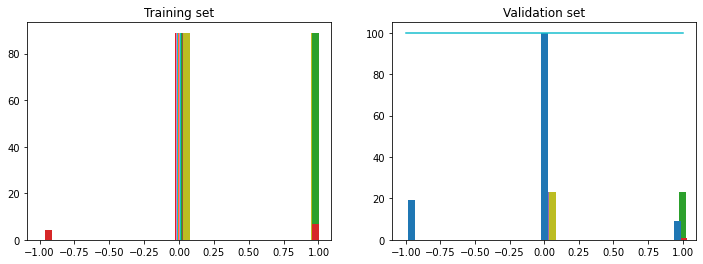

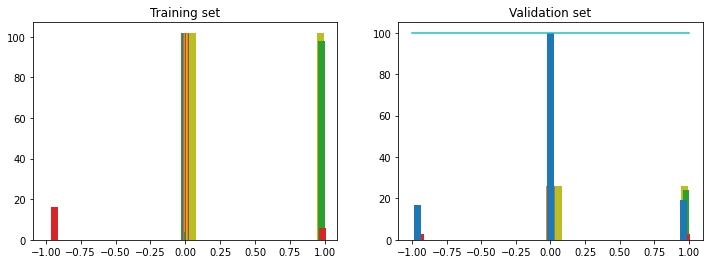

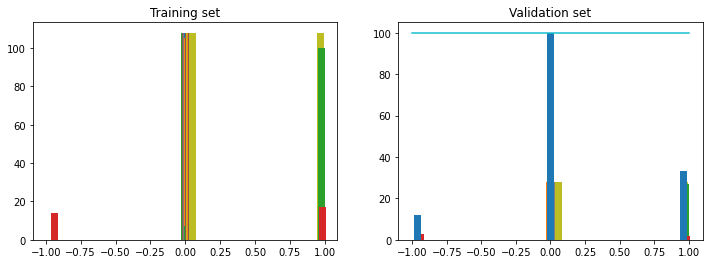

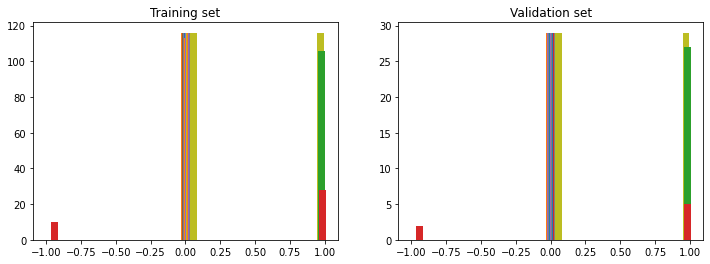

In [39]:
for e in range(1):
    data_order = [i for i in range(1,FILE_I_END+1)]
    for count,i in enumerate(data_order):
        file_name = 'preprocessed_training_data-{}.npy'.format(i)
        print(file_name)
        # full file information
        train_data = np.load(file_name,allow_pickle=True)
        df_image_clean, df = cleaning_data(train_data,show=True)
        X_train, X_valid, y_train, y_valid = train_test_split(df_image_clean, df, test_size=0.2, random_state=6)
        print('Training Samples: {}\nValid Samples: {}'.format(len(X_train), len(y_valid)))
        fig, axes = plt.subplots(1, 2, figsize=(12, 4))
        axes[0].hist(y_train, bins=num_bins, width=0.05)
        axes[0].set_title('Training set')
        axes[1].hist(y_valid, bins=num_bins, width=0.05)
        axes[1].set_title('Validation set')